# Tendencias en las preferencias de cerveza
Este conjunto de datos contiene alrededor de 1,5 millones de reseñas de cervezas de [BeerAdvocates](https://www.beeradvocate.com/). Su objetivo es caracterizar el conjunto de datos, agrupar cervezas similares y poder recomendar una cerveza, qué preguntas podría responder utilizando los datos, por ejemplo: si tuviera que elegir 5 cervezas para recomendar, ¿cuál elegiría? ¿Por qué? ¿Cuáles de los factores (sabor, aroma, apariencia, paladar) son más importantes para determinar la calidad general de una cerveza? Si por lo general disfruto de las IPA, ¿qué cerveza debo probar?

In [ ]:
!pip install seaborn matplotlib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

beer_reviews_1 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_1.csv")
beer_reviews_2 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_2.csv")
assert beer_reviews_1.columns.equals(beer_reviews_2.columns)

# Combinación de ambos dataframes
beer_reviews = pd.concat([beer_reviews_1, beer_reviews_2])

A continuación hacemos una descripción de las etiquetas que nos parecieron más interesantes a la hora de trabajar con el conjunto de datos.

* ```beer_name``` es la etiqueta que nos indica el **nombre de la cerveza**.

* ```brewery_name``` indica **nombre de la cervecería**.

* ```review_overall``` indica la **valoración de la calidad general** de la cerveza y de la facilidad para beberla.

* ```review_aroma``` indica **valoración del aroma** de la cerveza.

* ```review_appearance``` indica la **valoración del aspecto** de la cerveza.

* ```beer_style``` es una etiqueta que se da a una cerveza para describir su **carácter general** y, a menudo, su **origen**.

* ```review_palate``` **valoración del paladar o sensación en boca** de la cerveza.

* ```review_taste``` **valoración del sabor** de la cerveza.



In [ ]:
beer_reviews

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714708,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
714709,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
714710,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
714711,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [ ]:
beer_reviews.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


Pequeña descripción del dataframe:

* ¿Cuántas reseñas podemos encontrar en este conjunto de datos?
* Según la etiqueta *beer_beerid*, ¿cuántas cervezas únicas existen en nuestro conjunto de datos?
* Según la etiqueta *brewery_id*, ¿cuántas cervecerías únicas hay en total?


In [ ]:
print("--------------------------")
print("Descripción del dataframe:")
print("--------------------------")

# Total de reseñas
total_reviews = len(beer_reviews)
print(f'Número total de reseñas: {total_reviews}')

# Cervezas únicas según la columna 'beer_beerid'
cantidad_cervezas_unicas = beer_reviews['beer_beerid'].nunique()
print(f'Número de cervezas únicas: {cantidad_cervezas_unicas}')

# Cervecerías únicas según la columna 'brewery_id'
cantidad_cervecerias_unicas= beer_reviews['brewery_id'].nunique()
print(f'Número de cervecerías únicas: {cantidad_cervecerias_unicas}')

--------------------------
Descripción del dataframe:
--------------------------
Número total de reseñas: 1586614
Número de cervezas únicas: 66055
Número de cervecerías únicas: 5840


Limpieza del dataframe:

In [ ]:
beer_reviews = beer_reviews.dropna() # Hacemos la limpieza del dataframe para eliminar valores nulos

## Matriz de correlación

<ipython-input-6-798c731ef15c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = beer_reviews.corr()


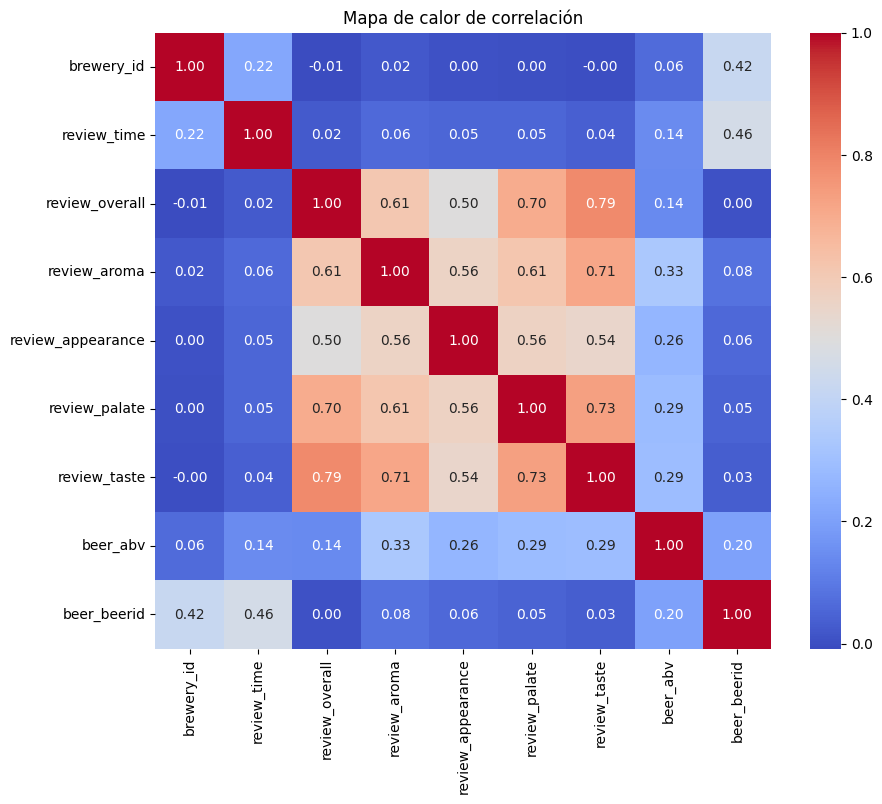

In [ ]:
# Calcula la matriz de correlación
corr = beer_reviews.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title('Mapa de calor de correlación')
plt.show()

## Distribución del número de reseñas por cerveza

In [ ]:
# Agrupa el dataframe por 'beer_name' y cuenta las reseñas
df_beer_review_counts = beer_reviews.groupby('beer_name').size()

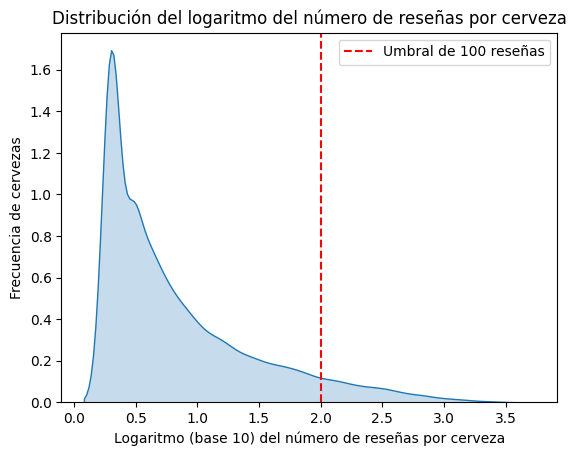

In [ ]:
# Agrega un pequeño valor para evitar tomar el logaritmo de cero
counts = df_beer_review_counts + 1

sns.kdeplot(np.log10(counts), fill=True)
plt.axvline(x=np.log10(100), color='red', linestyle='--', label='Umbral de 100 reseñas')
plt.xlabel('Logaritmo (base 10) del número de reseñas por cerveza')
plt.ylabel('Frecuencia de cervezas')
plt.title('Distribución del logaritmo del número de reseñas por cerveza')
plt.legend()
plt.show()

#Este código primero suma 1 a los conteos de reseñas para evitar tomar el logaritmo de cero (lo cual no está definido). Luego, toma el logaritmo (base 10) de los conteos y traza un histograma de estos valores.
#tomo reseñas minimo 10^2 =100

## Top 5 - General:

In [ ]:
# Define el umbral mínimo de reseñas
min_reviews = 100

# Filtra las cervezas que tienen al menos min_reviews
beer_filtered = beer_reviews[beer_reviews.groupby('beer_name')['beer_name'].transform('count') > min_reviews]

# Agrupa el DataFrame filtrado por 'beer_name' y calcula la media de 'review_overall'
beer_ratings_overall = beer_filtered.groupby('beer_name')['review_overall'].mean()

# Ordena las cervezas por su calificación media en orden descendente
beer_ratings_overall = beer_ratings_overall.sort_values(ascending=False)

# Selecciona las 5 cervezas con las calificaciones más altas
top_beers_overall = beer_ratings_overall.head(5)

print("Las 5 cervezas con las mejores calificaciones generales (con al menos {} reseñas) son:".format(min_reviews))
print(top_beers_overall)

Las 5 cervezas con las mejores calificaciones generales (con al menos 100 reseñas) son:
beer_name
Citra DIPA                                 4.630952
Cantillon Blåbær Lambik                    4.628205
Heady Topper                               4.625800
Deviation - Bottleworks 9th Anniversary    4.620536
Trappist Westvleteren 12                   4.617925
Name: review_overall, dtype: float64


## Top 5 - En gusto:

In [ ]:
# Agrupa el DataFrame filtrado por 'beer_name' y calcula la media de 'review_overall'
beer_ratings_taste = beer_filtered.groupby('beer_name')['review_taste'].mean()

# Ordena las cervezas por su calificación media en orden descendente
beer_ratings_taste = beer_ratings_taste.sort_values(ascending=False)

# Selecciona las 5 cervezas con las calificaciones más altas
top_beers_taste = beer_ratings_taste.head(5)

print("Las 5 cervezas con las mejores calificaciones sobre su gusto (con al menos {} reseñas) son:".format(min_reviews))
print(top_beers_taste)

Las 5 cervezas con las mejores calificaciones sobre su gusto (con al menos 100 reseñas) son:
beer_name
Rare Bourbon County Stout      4.767068
Pliny The Younger              4.724590
Trappist Westvleteren 12       4.718553
Vanilla Bean Aged Dark Lord    4.710526
Founders CBS Imperial Stout    4.697017
Name: review_taste, dtype: float64


## Top 5 - En aroma:

In [ ]:
# Agrupa el DataFrame filtrado por 'beer_name' y calcula la media de 'review_overall'
beer_ratings_aroma = beer_filtered.groupby('beer_name')['review_aroma'].mean()

# Ordena las cervezas por su calificación media en orden descendente
beer_ratings_aroma = beer_ratings_aroma.sort_values(ascending=False)

# Selecciona las 5 cervezas con las calificaciones más altas
top_beers_aroma = beer_ratings_aroma.head(5)

print("Las 5 cervezas con las mejores calificaciones sobre su gusto (con al menos {} reseñas) son:".format(min_reviews))
print(top_beers_aroma)

Las 5 cervezas con las mejores calificaciones sobre su gusto (con al menos 100 reseñas) son:
beer_name
Pliny The Younger              4.723770
Vanilla Bean Aged Dark Lord    4.717105
Citra DIPA                     4.690476
Heady Topper                   4.660981
Rare Bourbon County Stout      4.658635
Name: review_aroma, dtype: float64


## Recomendar cerveza según gusto:

In [ ]:
def recommend_beers(user_favorite_beer, num_recommendations):
    # Encuentra la calificación de sabor media de la cerveza favorita del usuario
    user_beer_taste = beer_reviews[beer_reviews['beer_name'] == user_favorite_beer]['review_taste'].mean()

    # Calcula la diferencia absoluta entre la calificación de sabor de cada cerveza y la de la cerveza favorita del usuario
    beer_reviews['taste_difference'] = abs(beer_reviews['review_taste'] - user_beer_taste)

    # Filtra las cervezas que tienen al menos min_reviews
    df_filtered = beer_reviews[beer_reviews.groupby('beer_name')['beer_name'].transform('count') > min_reviews]

    # Agrupa el DataFrame filtrado por 'beer_name' y calcula la media de 'taste_difference'
    df_beer_taste_diff = df_filtered.groupby('beer_name')['taste_difference'].mean()

    # Ordena las cervezas por su diferencia de sabor media en orden ascendente
    df_beer_taste_diff = df_beer_taste_diff.sort_values(ascending=True)

    # Selecciona las num_recommendations cervezas con las diferencias de sabor más bajas
    recommended_beers = df_beer_taste_diff.head(num_recommendations)

    print("Si te gusta {}, podrías disfrutar de estas cervezas:".format(user_favorite_beer))
    print(recommended_beers)

# Llama a la función con la cerveza favorita del usuario y el número de recomendaciones que quieras hacer
recommend_beers('Citra DIPA', 5)
# los números que muestran en la otra columna es la diferencia en base al gusto con la cerveza que ingresa el usuario

<ipython-input-12-adcf94c52f2a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer_reviews['taste_difference'] = abs(beer_reviews['review_taste'] - user_beer_taste)


Si te gusta Citra DIPA, podrías disfrutar de estas cervezas:
beer_name
Abner Imperial IPA          0.264899
Heady Topper                0.283019
Bell's Black Note Stout     0.286172
Czar Jack Imperial Stout    0.286765
Zombie Dust                 0.289455
Name: taste_difference, dtype: float64


## Caracterizar cervezas según el estilo:

In [ ]:
# Agrupa el dataframe por 'beer_style' y calcula la media de las calificaciones
beer_styles = beer_reviews.groupby('beer_style')[['review_aroma', 'review_taste', 'review_appearance', 'review_palate', 'review_overall']].mean()

# Ordena el dataframe por la calificación general media en orden descendente
beer_styles = beer_styles.sort_values(by='review_overall', ascending=False)

# Muestra las primeras filas del dataframe
beer_styles.head()

,review_aroma,review_taste,review_appearance,review_palate,review_overall
beer_style,,,,,
American Wild Ale,4.134697,4.161021,4.011311,4.047673,4.100379
Gueuze,4.116501,4.126455,4.037540,4.049688,4.087397
Quadrupel (Quad),4.133521,4.212530,4.119893,4.127000,4.073156
Lambic - Unblended,4.126564,4.132820,3.918191,3.969682,4.060635
American Double / Imperial Stout,4.161478,4.188474,4.164250,4.099737,4.030536


## Mostrar el puntaje de una cerveza según su nombre:

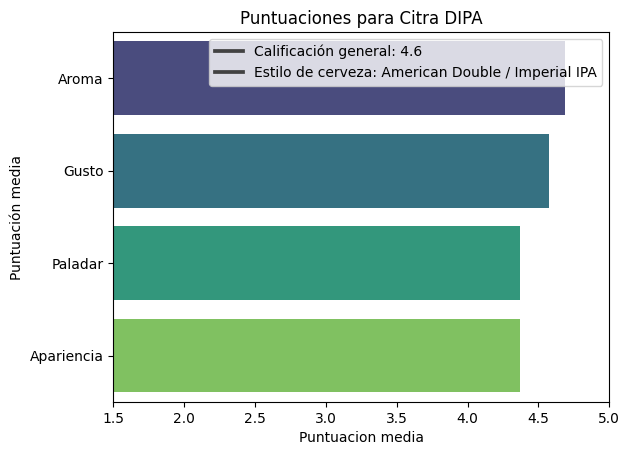

In [ ]:
def graficar_cerveza(nombre_cerveza):
    # Filtramos los datos para la cerveza especificada
    if nombre_cerveza in beer_reviews['beer_name'].values:
        beer_review = beer_reviews[beer_reviews['beer_name'] == nombre_cerveza]

        # Calculamos las medias de las puntuaciones
        media_aroma = beer_review['review_aroma'].mean()
        media_gusto = beer_review['review_taste'].mean()
        media_paladar = beer_review['review_palate'].mean()
        media_apariencia = beer_review['review_appearance'].mean()

        # Creamos las etiquetas para el gráfico
        etiquetas = ['Aroma', 'Gusto', 'Paladar', 'Apariencia']

        datos = pd.DataFrame({
            "Caracterisrica":etiquetas,
            "Puntuacion media": [media_aroma,media_gusto,media_paladar,media_apariencia]
        })

        # Creamos el gráfico de barras
        sns.barplot(x="Puntuacion media", y="Caracterisrica", data= datos, palette="viridis")
        # Ajustamos los límites del eje y
        plt.xlim(1.5, 5)
        plt.ylabel('Puntuación media')
        plt.title(f'Puntuaciones para {nombre_cerveza}')

        # Mostramos la leyenda con la calificación general y el estilo de cerveza
        calificacion_general = round(beer_review['review_overall'].mean(), 1)
        estilo_cerveza = beer_review['beer_style'].iloc[0]
        plt.legend([f'Calificación general: {calificacion_general}', f'Estilo de cerveza: {estilo_cerveza}'])

        # Mostramos el gráfico
        plt.show()
    else:
      print(f'La cerveza {nombre_cerveza} no se encuentra en el conjunto de datos')

# Ejemplo de uso de la función:
graficar_cerveza('Citra DIPA')

## Análisis de cervecerías: las 20 con más reseñas

In [ ]:
reseñas_cervecerias = beer_reviews.groupby('brewery_name').size()

# Ordenamos las cervecerías por el nro. de reseñas en orden descendente
reseñas_cervecerias = reseñas_cervecerias.sort_values(ascending=False)

# Filtramos las cervecerías que tienen al menos 'min_reviews'
reseñas_cervecerias = reseñas_cervecerias[reseñas_cervecerias > min_reviews]

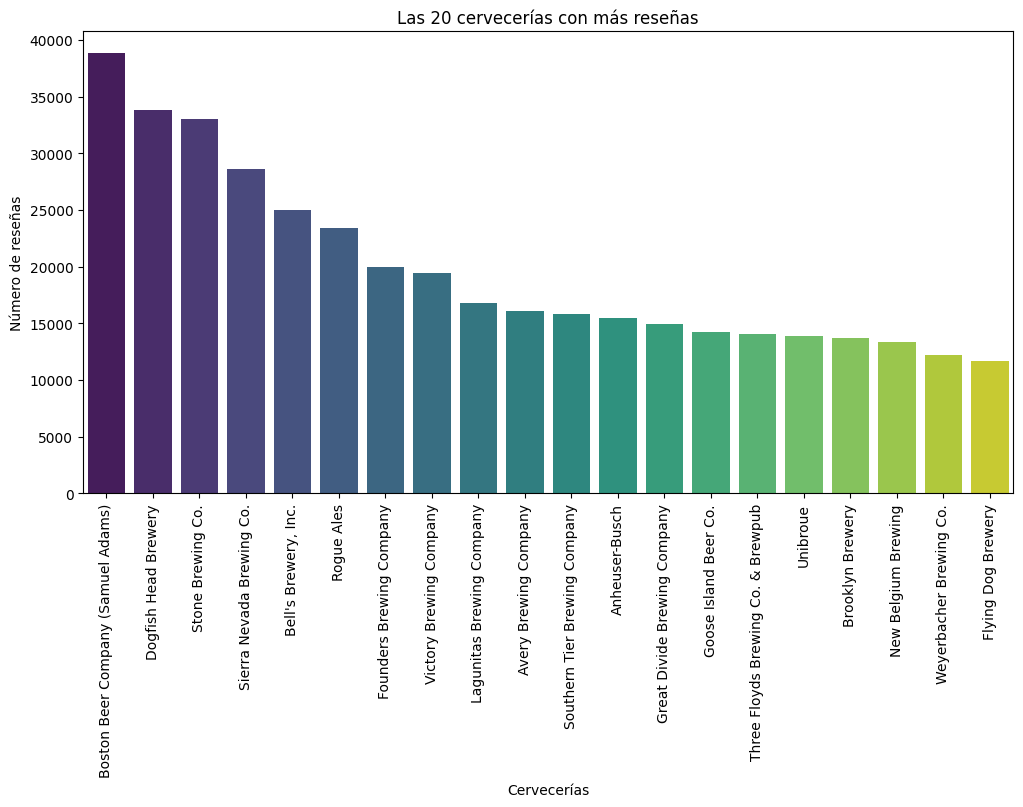

In [ ]:
principales_cervecerias = 20 # Las cervecerías principales que deseo mostrar en el gráfico

# Filtro las N cervecerías principales
top_reseñas_cervecerias = reseñas_cervecerias.head(principales_cervecerias)

# Creamos y configuramos el gráfico de barras para mostrar el nro. de reseñas por cervecería
plt.figure(figsize=(12, 6))
sns.barplot(x=top_reseñas_cervecerias.index, y=top_reseñas_cervecerias.values, palette='viridis')
plt.xlabel('Cervecerías')
plt.ylabel('Número de reseñas')
plt.title(f'Las {principales_cervecerias} cervecerías con más reseñas')
plt.xticks(rotation=90, fontsize=10)
plt.show()

## Clasificación de cervezas similares (clusters)

In [ ]:
# Selecciona las características relevantes para el clustering
features = ['review_taste', 'review_aroma', 'review_appearance', 'review_palate'] #'review_overall'

# Subconjunto del DataFrame con las características seleccionadas
beer_features = beer_reviews[features]

# Normaliza los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
beer_features_scaled = scaler.fit_transform(beer_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

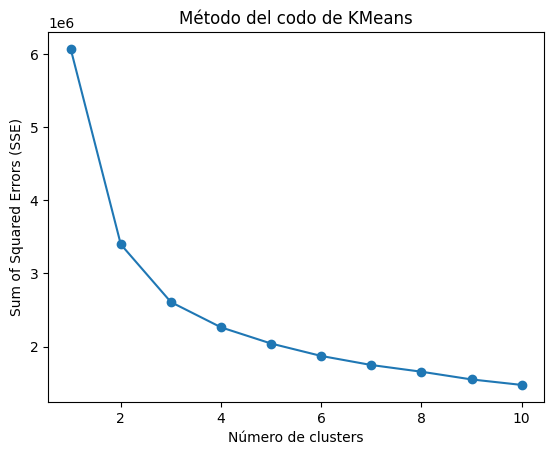

In [ ]:
# Selección del k óptimo usando el método del codo
sse = [] # Sum of squared errors (SSE)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k) # Vamos cargando el k en el algoritmo k-means
    kmeans.fit(beer_features_scaled)
    sse.append(kmeans.inertia_)

# Gráfica del método del codo para K-means
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del codo de KMeans')
plt.xlabel('Número de clusters')
plt.ylabel('Sum of Squared Errors (SSE)') # Inercia
plt.show()

In [ ]:
# Aplica el algoritmo de k-means
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
beer_reviews['cluster'] = kmeans.fit_predict(beer_features_scaled)

# Analiza las características promedio de cada cluster
cluster_means = beer_reviews.groupby('cluster')[features].mean()

# Muestra la información de los clusters
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id + 1}:")
    print(cluster_means.loc[cluster_id])
    print(f"Número de cervezas en el cluster: {len(beer_reviews[beer_reviews['cluster'] == cluster_id])}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-20-734989639d9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer_reviews['cluster'] = kmeans.fit_predict(beer_features_scaled)



Cluster 1:
review_taste         3.861664
review_aroma         3.788442
review_appearance    3.880648
review_palate        3.805697
Name: 0, dtype: float64
Número de cervezas en el cluster: 577453

Cluster 2:
review_taste         4.415817
review_aroma         4.309635
review_appearance    4.291843
review_palate        4.301835
Name: 1, dtype: float64
Número de cervezas en el cluster: 519154

Cluster 3:
review_taste         2.149534
review_aroma         2.239051
review_appearance    2.649756
review_palate        2.303916
Name: 2, dtype: float64
Número de cervezas en el cluster: 94898

Cluster 4:
review_taste         3.211305
review_aroma         3.214507
review_appearance    3.444462
review_palate        3.212499
Name: 3, dtype: float64
Número de cervezas en el cluster: 326973


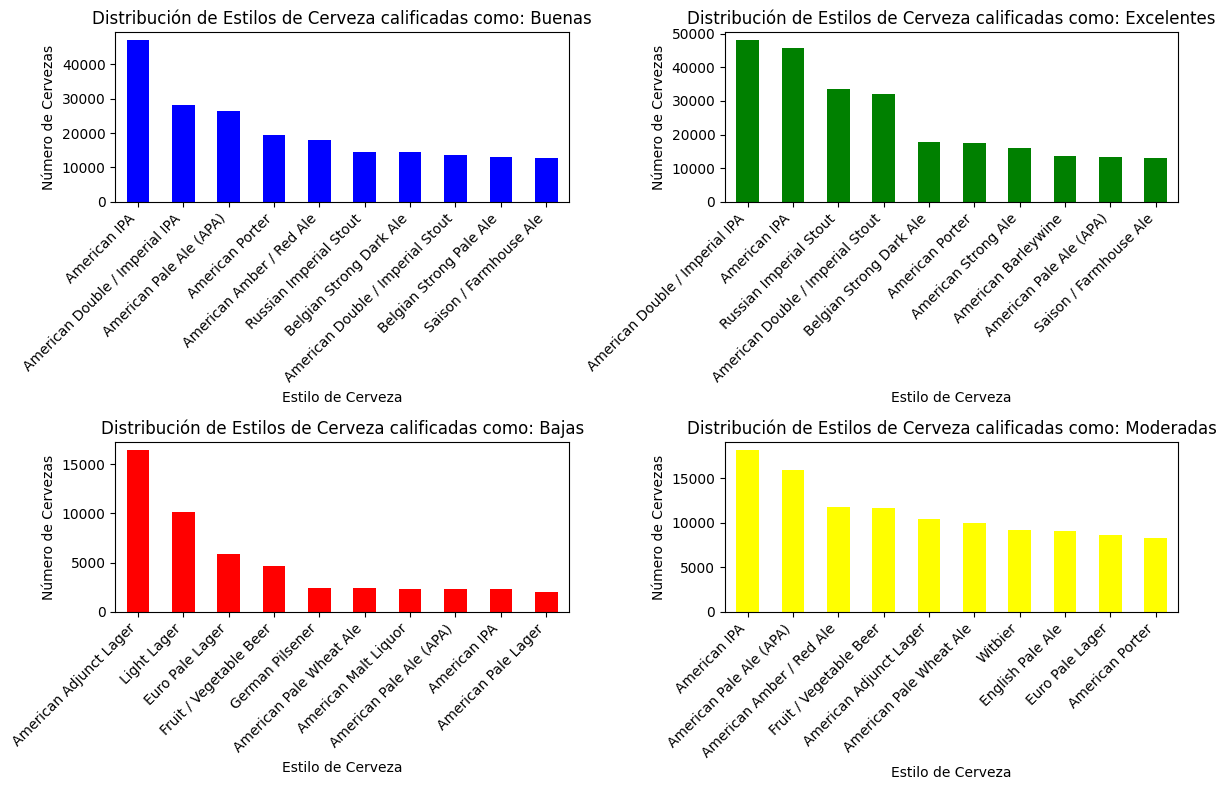

In [ ]:
# Asigna etiquetas a los clusters basándose en las puntuaciones promedio
cluster_labels = []

for cluster_id in range(num_clusters):
    cluster_mean_scores = cluster_means.loc[cluster_id]
    overall_mean = cluster_mean_scores.mean()

    if overall_mean >= 4.0:
        label = 'Excelentes'
    elif overall_mean >= 3.5:
        label = 'Buenas'
    elif overall_mean >= 3.0:
        label = 'Moderadas'
    else:
        label = 'Bajas'

    cluster_labels.append(label)

cluster_colors = ['blue', 'green', 'red', 'yellow']

# Actualiza el código del gráfico para incluir etiquetas
plt.figure(figsize=(12, 8))

for cluster_id in range(num_clusters):
    cluster_data = beer_reviews[beer_reviews['cluster'] == cluster_id]
    style_counts = cluster_data['beer_style'].value_counts().head(10)

    plt.subplot(2, 2, cluster_id + 1)
    style_counts.plot(kind='bar', color=cluster_colors[cluster_id])
    plt.title(f'Distribución de Estilos de Cerveza calificadas como: {cluster_labels[cluster_id]}')
    plt.xlabel('Estilo de Cerveza')
    plt.ylabel('Número de Cervezas')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
